## The Sparks Foundation Internship - Task 1
### Done by - Amal Mohamed Ashraf
## Prediction using Supervised ML
#### Problem Statement
The no. of study hours of the students along with the scores obtained by the students are given. We need to predict the score of the student who studies for 9.25hr/day.

#### Model to be used
We need to predict the score of the student who studies 9.25 hr/day. We have two variables number of study hours and the scores wherein the dependent variable is the score of the student and the independent variable is the number of study hours devoted by the student. Since we have only two variables under study we will make use of Simple Linear Regression to predict the target variable.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
#Reading data directly from the link
data=pd.read_csv("http://bit.ly/w-data")

In [3]:
#checking for null values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
#Printing the first 5 data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


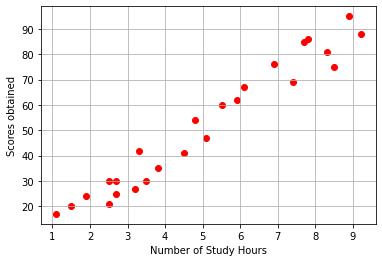

In [6]:
# Plotting the dataset inorder to see whether there is linearity in the data:
plt.scatter(data["Hours"],data["Scores"],c="r")
plt.xlabel("Number of Study Hours")
plt.ylabel("Scores obtained")
plt.grid()

##### Observation: From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### Preparing the data

In [7]:
#Seperating
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [9]:
#Importing the linear model:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Slope and Intercept 

In [10]:
print("Coeffcient: ",model.coef_)
print("Intercept: ",model.intercept_)

Coeffcient:  [9.68207815]
Intercept:  2.826892353899737


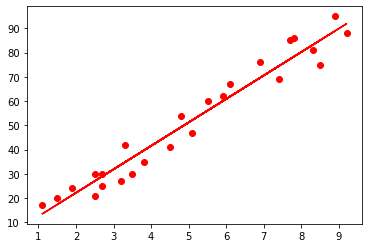

In [11]:
#Plotting the regression line
line=model.coef_*X+model.intercept_

#plotting for the test data
plt.scatter(X,y,c="r")
plt.plot(X,line,c="r")
plt.show()

### Predictions

In [12]:
#Predicting the score
y_pred=model.predict(X_test)
print(X_test)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [14]:
#Predicting with own data
hours=9.25
own_pred=model.predict(np.array(hours).reshape(-1,1))
print(f"Number of hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

Number of hours = 9.25
Predicted Score = 92.38611528261494


###### Our model has predicted 92.38 marks will be scored by a student if he/she prepared for 9.25 hours

### Checking for Accuracy of the Predicton

In [15]:
#Finding Mean absolute error(MAE),its the measure of errors between paired observations expressing the same phenomenon.
#It tells us the error while predicting the model by measuring the absolute difference between the actual and the predicted value of the target variable (y) under study.
#The error should be minimum or in other words the more the MAE value closer to zero the better is the model that we have predicted

In [16]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
